In [68]:
## Import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
## Read data 
iphone = pd.read_csv("D:/Top_mentor/Nov/19th_nov/batch88assignments/Decision Tree Project8\Decision Tree  - Assignment -4/iphone_purchase_records.csv")

In [4]:
## Copy main data
df1=iphone.copy()

In [5]:
df1.head(2)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0


In [10]:
## Number of rows and columns 
df1.shape

(400, 4)

In [6]:
## Finding null values 
df1.isnull().sum()
## No Null value is there

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
df1.describe(include='all')

,Gender,Age,Salary,Purchase Iphone
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69742.500000,0.357500
std,NaN,10.482877,34096.960282,0.479864
min,NaN,18.000000,15000.000000,0.000000
25%,NaN,29.750000,43000.000000,0.000000
50%,NaN,37.000000,70000.000000,0.000000
75%,NaN,46.000000,88000.000000,1.000000


# EDA 

In [35]:
i_male = len(df1[(df1['Gender']=='Male') & (df1['Purchase Iphone']==1)])
print('Number of male has iphone ', i_male)

Number of male has iphone  66


In [36]:
i_female = len(df1[(df1['Gender']=='Female') & (df1['Purchase Iphone']==1)])
print('Number of female has iphone ', i_female)

Number of female has iphone  77


<Axes: xlabel='Gender'>

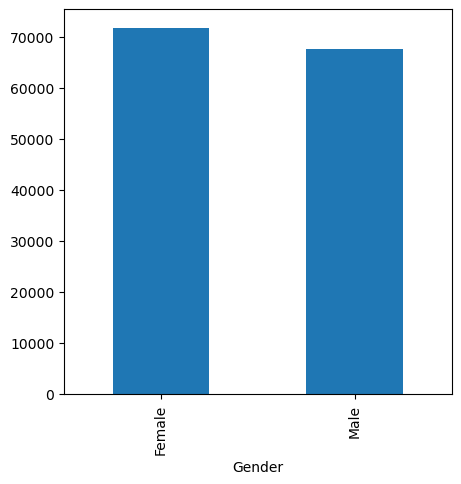

In [79]:
plt.figure(figsize = (5,5))
df1.groupby('Gender')['Salary'].mean().plot(kind='bar')

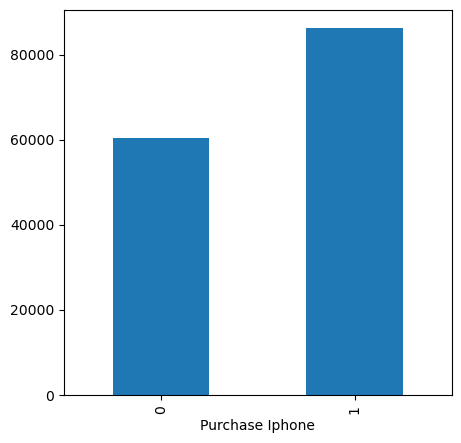

In [78]:
plt.figure(figsize = (5,5))
df1.groupby('Purchase Iphone')['Salary'].mean().plot(kind='bar')
plt.show()

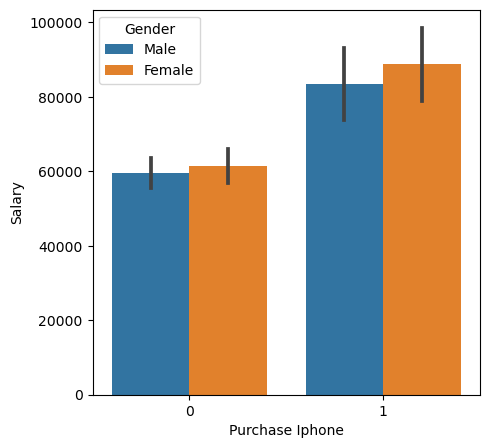

In [77]:
plt.figure(figsize = (5,5))
sns.barplot(x='Purchase Iphone', y = 'Salary', hue='Gender', data =df1)
plt.show()

<Figure size 300x200 with 0 Axes>

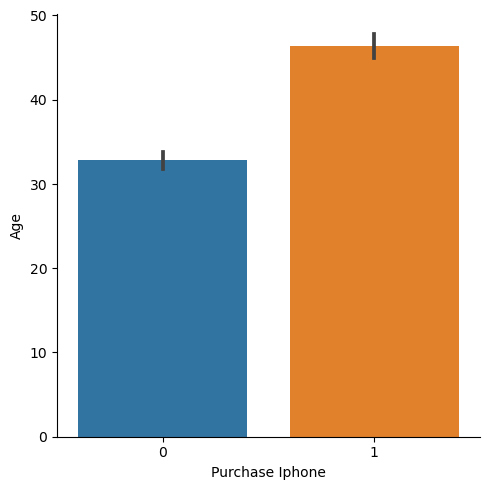

In [74]:
plt.figure(figsize = (3,2))
sns.catplot(x='Purchase Iphone', y='Age', data = df1, kind ='bar')
plt.show()

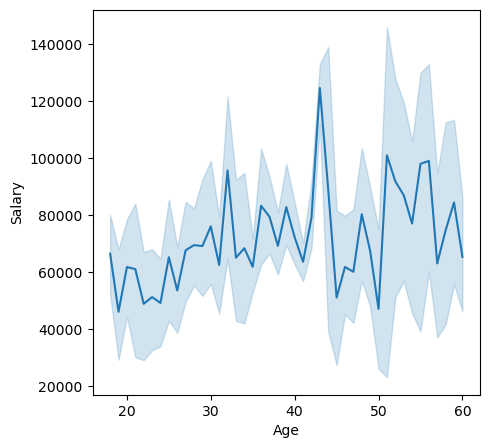

In [86]:
plt.figure(figsize = (5,5))
sns.lineplot(x='Age', y ='Salary', data = df1)
plt.show()

In [82]:
## Correlation 
correlation = df1.corr()
correlation

C:\Users\Acer\AppData\Local\Temp\ipykernel_12596\1101331922.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


<Axes: >

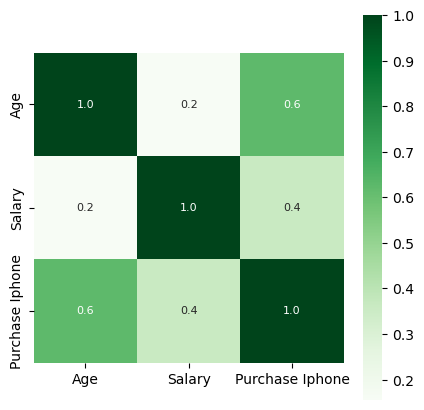

In [85]:
plt.figure(figsize = (5,5))
sns.heatmap(correlation, annot = True, cbar = True,square =True, annot_kws={'size':8}, fmt='.1f', cmap='Greens')

# Model training and prediction 

In [95]:
## Replace to 'Male':1, 'Female':0
df1['Gender'] = df1['Gender'].replace({'Male':1, 'Female':0})

In [100]:
X = df1[['Gender', 'Age', 'Salary']]
X

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [101]:
y = df1['Purchase Iphone']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=126)

In [151]:
def ds_tree(X_train,y_train,X_test):
    model_clf = DecisionTreeClassifier(criterion='entropy',max_depth =2)
    train_model = model_clf.fit(X_train,y_train)
    prediction = train_model.predict(X_test)
    return prediction

In [152]:
prediction = ds_tree(X_train,y_train,X_test)
prediction

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [153]:
model_accuracy =  accuracy_score(prediction,y_test)
print('Model accuracy score =', model_accuracy)

Model accuracy score = 0.91
